{46: 52, 32: 1614, 45: 1492, 51: 1468, 58: 938, 13: 1427, 19: 1462, 25: 398, 39: 408, 53: 24, 6: 955, 7: 417, 26: 940, 38: 968, 0: 1635, 57: 406, 18: 43, 20: 99, 8: 68, 12: 86, 11: 38, 5: 77, 33: 10, 21: 29, 42: 24, 24: 62, 4: 24, 60: 26, 44: 83, 52: 125, 3: 20, 30: 17, 59: 78, 40: 63, 17: 20, 41: 28, 10: 23, 47: 23, 37: 84, 28: 19, 31: 11, 27: 85, 22: 21, 54: 25, 50: 44, 9: 35, 62: 11, 56: 66, 14: 47, 23: 20, 55: 27, 36: 32, 35: 20, 16: 19, 2: 8, 15: 15, 43: 22, 61: 16, 1: 15, 29: 23, 49: 14, 34: 13, 48: 17, 63: 5}


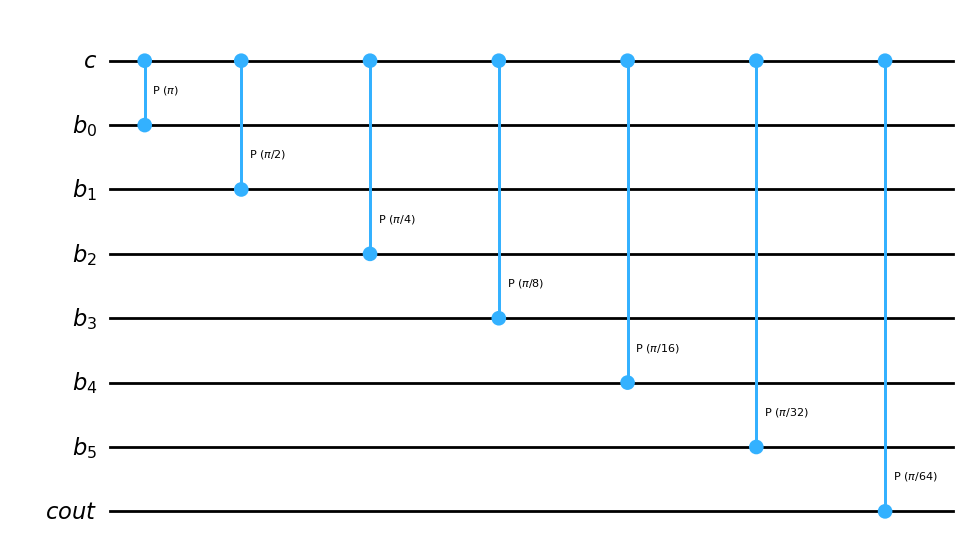

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from draperqftadder_adapt import adder_mod, draper_adder
from qiskit.circuit.library import QFT
from math import log2

def ctrl_mult_mod(n_bits, a, N):
    # a * b mod N

    reg_control = QuantumRegister(1, "c")
    
    reg_b = QuantumRegister(n_bits, "b")

    reg_c_aux = QuantumRegister(1, "c_aux")

    reg_0 = QuantumRegister(n_bits + 1, "0")

    reg_help = QuantumRegister(1, "help")

    circuito = QuantumCircuit(reg_control, reg_b, reg_c_aux, reg_0, reg_help, name="mult_mod")

    circuito.append(QFT(n_bits + 1, do_swaps=False), reg_0)

    for i in range(n_bits):
        circuito.ccx(reg_control[0], reg_b[i], reg_c_aux[0])

        circuito.append(adder_mod(n_bits, ((2**i) * a) % N, N, controlado=True), reg_c_aux[:] + reg_0[:] + reg_help[:])

        circuito.ccx(reg_control[0], reg_b[i], reg_c_aux[0])

    circuito.append(QFT(n_bits + 1, do_swaps=False).inverse(), reg_0)

    return circuito


n_bits = 6
N = 10
a = 1
b = 0

reg_c = QuantumRegister(1, "c")

reg_b = QuantumRegister(n_bits, "b")
number_b = QuantumCircuit(reg_b)
#number_b.initialize(b)

reg_c_aux = QuantumRegister(1, "c_aux")

reg_0 = QuantumRegister(n_bits + 1, "0")
number_0 = QuantumCircuit(reg_0)
#number_0.initialize(0)
    
reg_help = QuantumRegister(1, "help")

reg_result = ClassicalRegister(n_bits, "resultado")

circuito = QuantumCircuit(reg_c, reg_b, reg_c_aux, reg_0, reg_help, reg_result)

circuito.x(reg_c[0])
circuito.h(reg_b)

#circuito.append(number_b, reg_b)
#circuito.append(number_0, reg_0)

circuito.append(ctrl_mult_mod(n_bits, a, N), reg_c[:] + reg_b[:] + reg_c_aux[:] + reg_0[:] + reg_help[:])

circuito.append(QFT(n_bits, inverse=True), reg_b)

circuito.measure(reg_b, reg_result)

from qiskit_aer import AerSimulator
from qiskit import transpile

backend1 = AerSimulator()
qc1 = transpile(circuito, backend=backend1)

from qiskit.primitives import StatevectorSampler

statevectorsampler = StatevectorSampler()
pub = (qc1)
job = statevectorsampler.run([pub], shots=2**14)
print(job.result()[0].data.resultado.get_int_counts())

ctrl_mult_mod(4, 5, 11).draw("mpl")
draper_adder(n_bits, a, controlado=True).draw("mpl")
#circuito.draw("mpl")


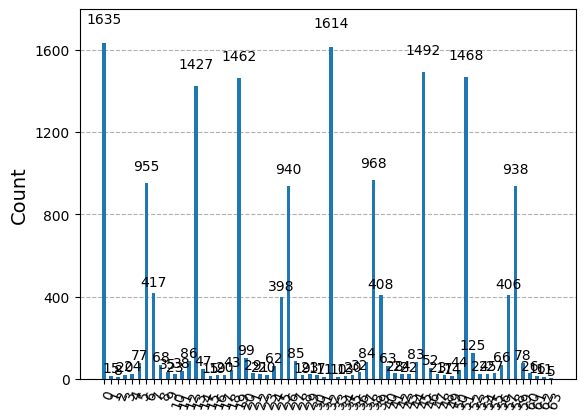

In [8]:
from qiskit.visualization import plot_histogram

plot_histogram(job.result()[0].data.resultado.get_int_counts())